## 절차

|절차|단계|목표/설명|
|---|---|---:|
|1|연구목표| 사용자가 입력한 텍스트를 예측하여 어떤 언어인지 판독한다.(영어권)<br> 머신러닝의 사용 여부 판단(굳이 사용안해도 처리 가능하면 제외)<br> 머신러닝을 적용, 지도 학습법을 사용, 알고리즘은 여러 개를 테스트하여 최적화가 된 알고리즘을 사용(파라미터적용)<br>|
|2|데이터획득/수집|실전: 위키피디아/소설/법률 등 텍스트 크롤링<br> 임시: 제공데이터(법령/대본 등)|
|3|데이터준비/통찰/전처리|텍스트에서 알파벳의 출현 빈도를 계산하여 백터화 <br> 훈련데이터/텍스트데이터 구성|
|4|데이터탐색/통찰/시각화|언어별로 알파벳을 출현/사용 빈도가 다르다라는 명제를 확인<br> 시각화를 진행, 바차트를 국가별로 비교, 선형차트를 통해서 빈도의 차이점 시각화|
|5|데이터모델링 or 모델구축|-학습<br>-예측<br>-정답률<br>-성능평가<br>-알고리즘체인/파이트라인구축<br>-하이퍼파라미터튜닝<br>-연구목표에서 설정한 목표치까지 도달할 때까지 반복|
|6|시스템 통합 or (솔루션, 서비스 레포트)|-모델을 덤프 -> flask웹서비스 기반에 연동 -> 서비스 구성<br> -모델을 업데이트/다운그레이드가 자동화 할 수 있게 구성<br>-선순환구조(사용자가 사용할수록 그 데이터가 다시 모여 학습 -> 성능을 향상 -> 업데이트|

### 1. 연구목표 [OK]

### 2. 데이터획득/수집

- 영어 샘플사이트 : https://en.wikipedia.org/wiki/Tennis
- .mw-parser-output p 혹은 #.mw-content-text p  # 직계 안에 있는거 싹다.( 모든 p 태그 )

In [269]:
# 2-1. 실전용: 미국, 프랑스, 인도네시아, 타갈리아어 등의 위키피디아의 텍스트 수집
#              수집된 정량을 되도록 비슷한 분량으로 준비
import urllib.request as req # 요청객체 준비(url을 열고 읽기위한 모듈)
from bs4 import BeautifulSoup

In [270]:
# 2-2. 요청 및 soup 로 구성
target_url = 'https://en.wikipedia.org/wiki/Tennis'
soup = BeautifulSoup( req.urlopen(target_url), 'html5lib' ) #req :응답 #html5lib 느리나 정확하게

In [271]:
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en"><head>
<meta charset="utf-8"/>
<title>Tennis - Wikipedia</title>
<script>document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Tennis","wgTitle":"Tennis","wgCurRevisionId":912238585,"wgRevisionId":912238585,"wgArticleId":29773,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1: Julian–Gregorian uncertainty","CS1 maint: Date format","Webarchive template wayback links","CS1 maint: Multiple names: authors list","Articles with short description","Wikipedia pages semi-protected against vandalism","EngvarB from July 2015","Use dmy dates from February 2018","Articles containing Greek-language text","All articles needing examples","Articles needing examples from September 2018","Articles with Curlie links"

In [272]:
# 2-3. 데이터 추출
ouptut = soup.select('#mw-content-text p') # select 다 찾는거.
len(ouptut)

99

In [273]:
# 2-4 리스트에 모든 텍스트를 담아라(맴버로)
texts = [ t.text for t in ouptut ]
texts[:3]

['\n\n\n',
 "Tennis is a racket sport that can be played individually against a single opponent (singles) or between two teams of two players each (doubles). Each player uses a tennis racket that is strung with cord to strike a hollow rubber ball covered with felt over or around a net and into the opponent's court. The object of the game is to maneuver the ball in such a way that the opponent is not able to play a valid return. The player who is unable to return the ball will not gain a point, while the opposite player will.\n",
 'Tennis is an Olympic sport and is played at all levels of society and at all ages. The sport can be played by anyone who can hold a racket, including wheelchair users. The modern game of tennis originated in Birmingham, England, in the late 19th century as lawn tennis.[1] It had close connections both to various field (lawn) games such as croquet and bowls as well as to the older racket sport today called real tennis. During most of the 19th century, in fact,

In [274]:
# 통합, 조인 <-> 분해(의 결과물은 리스트)
str_texts = ' '.join(texts) # 분해되있는 texts들을 한 덩어리로 만들기
str_texts[:20]

'\n\n\n Tennis is a rack'

In [275]:
# 공백,영어만 두고 날린다. 단 공백 정도는 단어들을 구분하기 위해서 두겠다.
# 정규식 => 영어만 > [a-z A-Z ]* # Z 뒤에 공백은 공백을 뜻함 
import re

In [276]:
p = re.compile('[^a-zA-Z ]*')  # '^' 넣으면 반대

In [277]:
tmp = p.sub('',str_texts)

In [278]:
# 이런 데이터를 대상 언어별로 준비하여 대량의 데이터를 확보한다.
# 충분한 학습을 수행하기 위한 재료 
# 단, 시간 관계상 수집하는 방법에 대해서 살펴봤고, 이렇게 모아진 데이터를 사용하여 학습을 진행할 것이다.

### 3. 데이터준비/통찰/전처리

- 제공되는 모든 데이터를 읽어서 처리
- 알파벳의 빈도를 계산하여 수치화

In [279]:
# 파일 목록 리스트 
import glob, os.path, re, json 
# 한꺼번에 읽어오는거? > glob
file_list = glob.glob('../data/train/*.txt')
file_list[:2], len(file_list)

(['../data/train\\en-1.txt', '../data/train\\en-2.txt'], 20)

In [280]:
# 파일을 읽어서 => 빈도를 계산 => 지도방식 데이터로 구성한다면 => 변수(a~z)+답안(1개)
def check_lang_freq( file_path ):
    
    #---------------------------------------------------------------------------------------
    # 1. 정답 변수(컬럼)을 컬럼을 구성하기 위한 => '../data/train\\en-1.txt' => en 추출
    #    정답 추출
    name = os.path.basename( file_path )
#    print( name )
    # file_path 데이터(자료)를 분석해보니, 위치가 변경되면 정규식이 적용 안될 수 있다.
    # ^[a-z]{2,}
    p    = re.compile( '^[a-z]{2,}' )
    lang = p.match( name ).group()
#    print( name, lang )
    # 파일명을 추출하여 거기서 정규식을 적용하는 것이 합리적 => 경로가 바껴도 OK
    #---------------------------------------------------------------------------------------
    
    #---------------------------------------------------------------------------------------
    # 알파벳 빈도 계산
    # 2. 파일을 오픈 -> 읽고 -> 닫기 -> [ 0,0,0,0,0,0,0,0,0,0,0,0,0,0, ... , 0] 형식
    with open( file_path, 'r', encoding='utf-8' ) as f:
        # 데이터를 들여다보니 대,소문자가 섞여있다. 아스키 값이 다르니 한쪽 방향으로 통일해야 한다.
        # 여기서는 소문자로 통일하겠다.
        text = f.read().lower()
        p1   = re.compile( '[^a-zA-Z ]*' )
        text = p1.sub( '' , text )
#        print(text[:100])
    #    알파벳 순서대로 빈도 수를 기록하겠다.
    cnts = [ 0 for n in range(26) ]
    #    a->ASCII ~z 값이 순서대로 적용된다. z-a = 25 (z에서 a를 빼면) ord()
    asc_a, asc_z, asc_ws = ord('a'), ord('z'), ord(' ')
#    print(asc_a, asc_z, asc_ws)
    #    a-a = 0, b-a = 1, .... z-a=25 => 빈도를 기록할 인덱스와 동일
    for ch in text:
        # ch를 아스키로 변환
        n = ord(ch)
        if asc_a <= n <= asc_z: # 알파벳이 맞으면
        #if ord(ch) != asc_ws: # 공백만 뺴고
            cnts[ n - asc_a ] += 1  # 빈도 증가
    #---------------------------------------------------------------------------------------

    #---------------------------------------------------------------------------------------
    # 3. 빈도는 파일 한 개당 전체 글의 빈도 수에 해당 a~z까지의 빈도 수로 표현
    #    => 데이터를 같은 구간에 배치 => 정규화 0~1 사이에 배치
    # 전체빈도
    total_cnt = sum(cnts)
    freq = list( map( lambda x:x/total_cnt , cnts ) ) # 전체 빈도에 대한 a,b,c... 빈도
    #---------------------------------------------------------------------------------------

    #---------------------------------------------------------------------------------------
    # 4. 리턴: 정답, 빈도를 담은 리스트 
    #---------------------------------------------------------------------------------------
    return lang, freq

In [281]:
# 함수를 적용한 케이스
for file in file_list:
    lang, freq = check_lang_freq( file )
    #print( lang, sum(freq) )


In [282]:
# 특정 폴더 내의 데이터를 읽어서 빈도로 리턴
# file_glob => '../data/train/*.txt'
def load_files( file_glob ):
    langs = []
    freqs = []    
    file_list = glob.glob( file_glob )    
    for file in file_list:
        lang, freq = check_lang_freq( file )
        langs.append( lang )
        freqs.append( freq )
    return { 'labels':langs, 'freqs':freqs }

In [283]:
# 데이터 로드
train_data = load_files( '../data/train/*.txt' )
test_data  = load_files( '../data/test/*.txt' )

In [284]:
# 데이터 확인
len(train_data['labels']), len(test_data['labels'])

(20, 8)

In [285]:
# 데이터 적제
# 자료구조를 그대로 유지해서 저장 => json 모듈로 처리
with open('../data/lang_label_freq.json', 'w', encoding='utf-8') as f: # w :쓰기모드
    json.dump([train_data, test_data], f ) # 덤프친다.

### 4. 데이터탐색/통찰/시각화

In [286]:
import matplotlib.pyplot as plt
import pandas as pd
import json
%matplotlib inline

In [287]:
# 데이터 로드
with open('../data/lang_label_freq.json', 'r', encoding='utf-8') as fp:
    freq = json.load(fp)

In [288]:
# 데이터 구조 확인, 데이터 들여다보기
freq

[{'labels': ['en',
   'en',
   'en',
   'en',
   'en',
   'fr',
   'fr',
   'fr',
   'fr',
   'fr',
   'id',
   'id',
   'id',
   'id',
   'id',
   'tl',
   'tl',
   'tl',
   'tl',
   'tl'],
  'freqs': [[0.07595212187159957,
    0.012840043525571273,
    0.04570184983677911,
    0.04613710554951034,
    0.10533188248095757,
    0.015669205658324265,
    0.019151251360174103,
    0.043743199129488576,
    0.07399347116430903,
    0.0017410228509249185,
    0.00544069640914037,
    0.05375408052230685,
    0.026332970620239392,
    0.07747551686615888,
    0.08966267682263329,
    0.016539717083786723,
    0.0,
    0.07769314472252448,
    0.061371055495103376,
    0.08052230685527748,
    0.02589771490750816,
    0.009793253536452665,
    0.014145810663764961,
    0.0006528835690968443,
    0.02002176278563656,
    0.0004352557127312296],
   [0.08417789436031954,
    0.019911768212710148,
    0.030404196971503518,
    0.038869679265529984,
    0.13699773458924527,
    0.0174078931679980

In [289]:
# 볼륨
# 훈련데이터 개수
len(freq[0]['labels']), len(freq[0]['freqs'])  # train(훈련)의 답안

(20, 20)

In [290]:
# 테스트데이터 개수
len(freq[1]['labels']), len(freq[1]['freqs'])

(8, 8)

In [291]:
# 타입 확인
type(freq[0]['freqs'])

list

In [292]:
# 훈련데이터를 df로 변환
df_freq= pd.DataFrame( freq[0]['freqs'])  # freq 부분 변환
df_freq.shape

(20, 26)

In [293]:
df_freq.head(2)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.075952,0.012840,0.045702,0.046137,0.105332,0.015669,0.019151,0.043743,0.073993,0.001741,...,0.000000,0.077693,0.061371,0.080522,0.025898,0.009793,0.014146,0.000653,0.020022,0.000435
1,0.084178,0.019912,0.030404,0.038870,0.136998,0.017408,0.031239,0.027423,0.075355,0.002623,...,0.005485,0.090140,0.071659,0.077739,0.030643,0.013712,0.013950,0.002027,0.010731,0.000596


In [294]:
df_label= pd.DataFrame( freq[0]['labels']) # labels 부분 변환
df_label.shape

(20, 1)

In [295]:
df_label

,0
0,en
1,en
2,en
3,en
4,en
5,fr
6,fr
7,fr
8,fr
9,fr


In [300]:
# df_label의 컬럼명을 0에서 'label' 로 수정
df_label.rename(columns={0:"label"}, inplace = True )# 인터넷에서 찾은 컬럼 부분수정
# df_labe.columns = ['label'] # 통째로 갈아 엎는 법

In [301]:
# df_freq, df_label을 데이터 프레임을 합치시오 => 20x27형태
df_tmp = pd.concat([df_freq,df_label], sort=True, axis=1)  # sort,axis로 기준잡기
df_tmp.shape

# 번외 merge를 이용한 2번쨰 방법(키없이)
df_tmp = pd.merge(df_freq,df_label, left_index=True, right_index=True)
df_tmp.shape

(20, 27)

In [302]:
# 기본기
# 알파벳 문자열 지원(자동생성)
from string import ascii_lowercase
ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [303]:
# 0~25라는 컬럼명을 a-z까지 대체
# a,b,c, ... , z , label
df_tmp.columns = list(ascii_lowercase) + [ df_tmp.columns[-1]]

In [304]:
df_tmp

,a,b,c,d,e,f,g,h,i,j,...,r,s,t,u,v,w,x,y,z,label
0,0.075952,0.012840,0.045702,0.046137,0.105332,0.015669,0.019151,0.043743,0.073993,0.001741,...,0.077693,0.061371,0.080522,0.025898,0.009793,0.014146,0.000653,0.020022,0.000435,en
1,0.084178,0.019912,0.030404,0.038870,0.136998,0.017408,0.031239,0.027423,0.075355,0.002623,...,0.090140,0.071659,0.077739,0.030643,0.013712,0.013950,0.002027,0.010731,0.000596,en
2,0.071646,0.012172,0.045643,0.032642,0.120055,0.014661,0.025173,0.023513,0.094606,0.002490,...,0.053942,0.087967,0.081051,0.029046,0.018811,0.011895,0.000553,0.017981,0.000553,en
3,0.072210,0.027715,0.029977,0.039593,0.121041,0.016780,0.023567,0.059012,0.065234,0.001508,...,0.059201,0.073341,0.093703,0.024321,0.005090,0.019608,0.006033,0.017534,0.001697,en
4,0.073806,0.020368,0.031099,0.039641,0.141261,0.020368,0.020368,0.056943,0.065046,0.003285,...,0.072492,0.059571,0.095488,0.024967,0.010731,0.023872,0.003066,0.014893,0.000657,en
5,0.078738,0.010451,0.037253,0.053283,0.150487,0.016222,0.010708,0.015517,0.069377,0.002308,...,0.075083,0.071621,0.077584,0.053475,0.014299,0.000705,0.003911,0.003655,0.000834,fr
6,0.077913,0.014919,0.035749,0.044830,0.149735,0.011784,0.011496,0.012613,0.072003,0.002126,...,0.074741,0.082093,0.070561,0.054452,0.010631,0.004541,0.003892,0.005334,0.000468,fr
7,0.072717,0.013065,0.035412,0.044990,0.150754,0.010523,0.010582,0.011528,0.071416,0.003015,...,0.076914,0.078333,0.065681,0.050902,0.012711,0.002601,0.004966,0.004848,0.000118,fr
8,0.072599,0.015761,0.039836,0.051129,0.157111,0.013031,0.013527,0.014396,0.085629,0.004344,...,0.082030,0.066518,0.061057,0.042690,0.015140,0.000745,0.005088,0.004964,0.001986,fr
9,0.078947,0.011501,0.035283,0.051852,0.143275,0.012086,0.020078,0.019493,0.089864,0.003899,...,0.077778,0.072320,0.063353,0.043860,0.014035,0.000390,0.003314,0.005263,0.001170,fr


In [ ]:
# a~z 대체 노가다버전
# df_tmp.columns = ["a", "b", "c",'d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

In [305]:
# 알파벳을 인덱스로, 국가를 컬럼으로 배치 -> a에 대한 국가별 빈도수 배치
# 빈도수를 평균내라 >> (국가별로)
df_tmp_pv = df_tmp.pivot_table( columns=df_tmp.label )
df_tmp_pv.head(2)

label,en,fr,id,tl
a,0.075558,0.076183,0.160047,0.210537
b,0.018601,0.013140,0.026276,0.021824


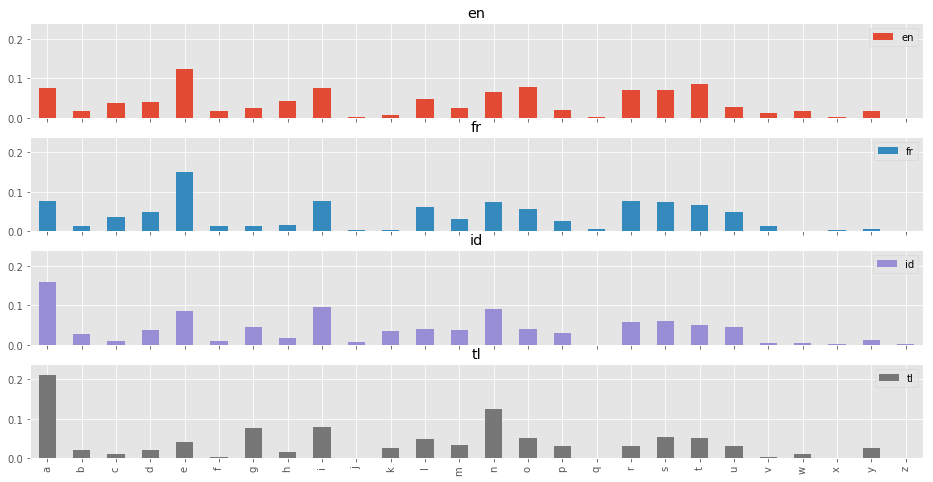

In [319]:
# 막대 그래프로 비교
plt.style.use('ggplot')
# ylim를 사용하여 y축의 단위를 통일
df_tmp_pv.plot( kind='bar', subplots=True, figsize=(16, 8), ylim=(0,0.24) ) # y축은 빈도의 값
# 저장
plt.savefig('../data/national_frequence.png')

In [334]:
for word in ascii_lowercase:print(word);break  # 파이썬에서 ';'은 두 줄을 한 줄로 줄여 쓸 때 쓴다. 구분해주는 기호.

a


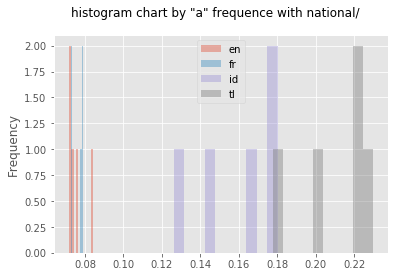

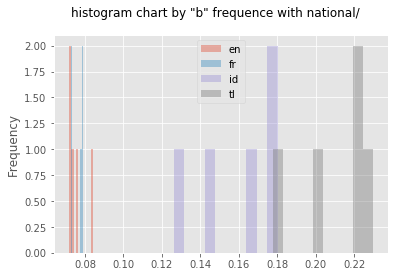

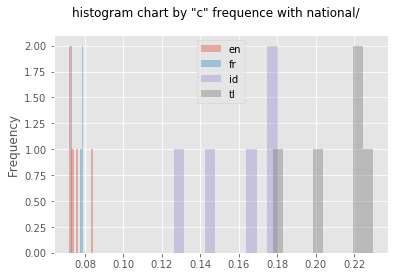

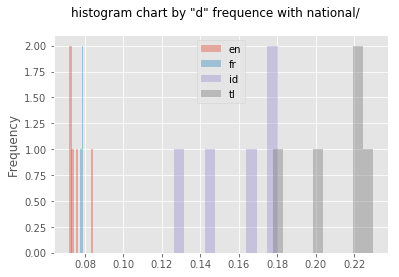

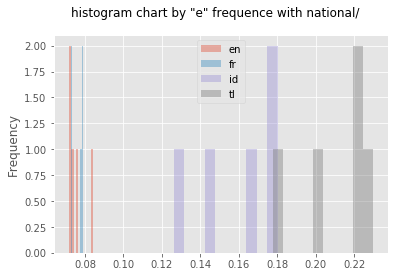

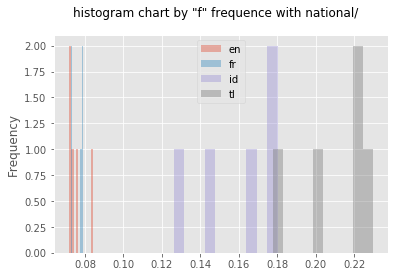

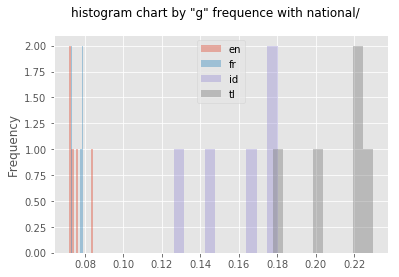

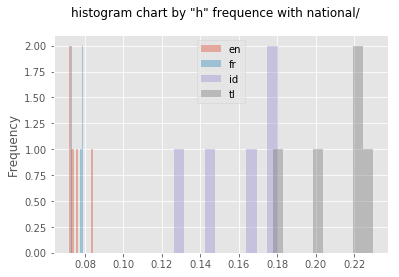

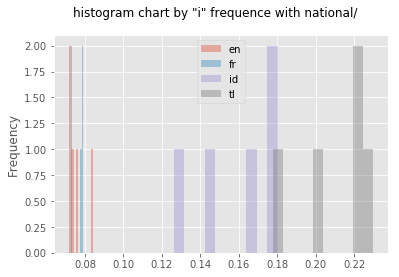

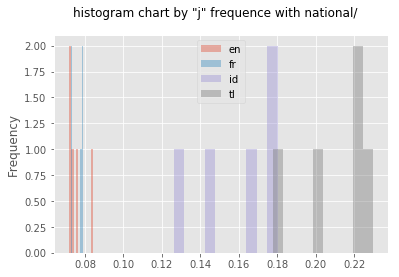

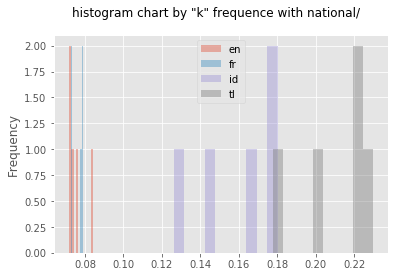

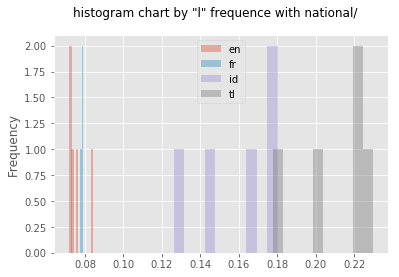

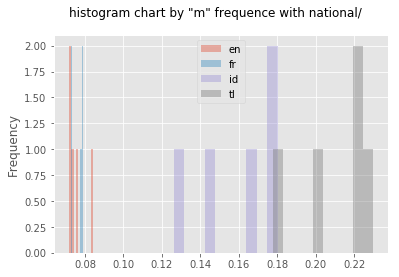

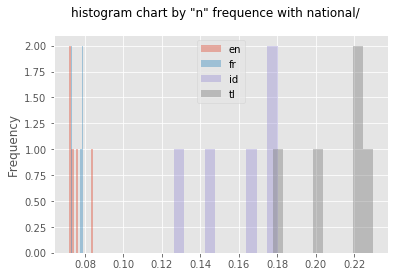

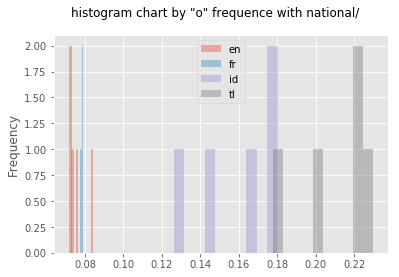

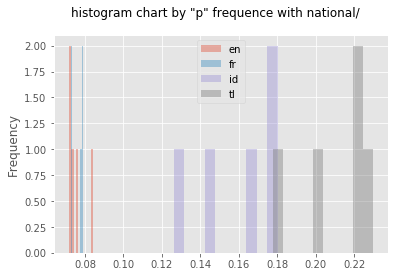

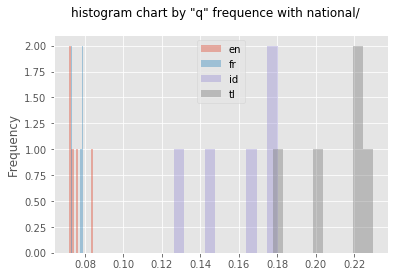

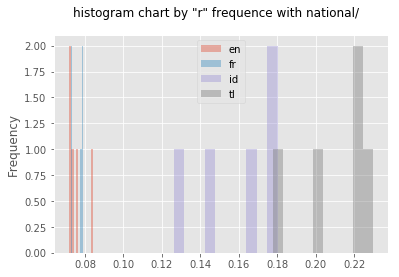

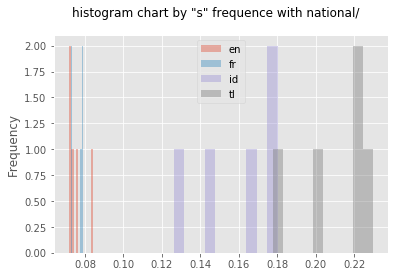

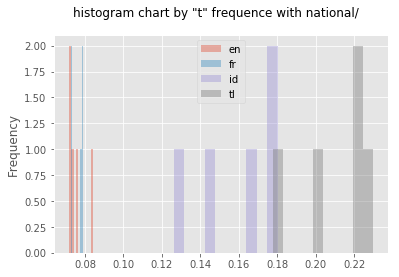

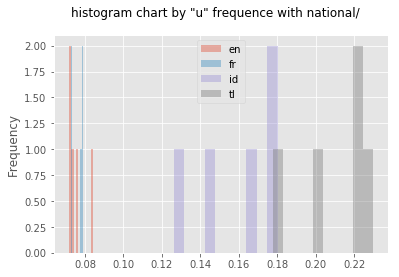

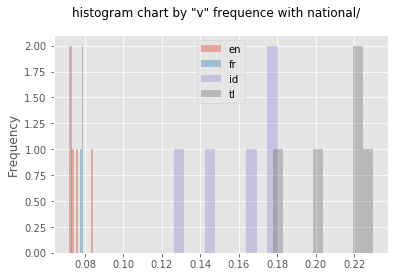

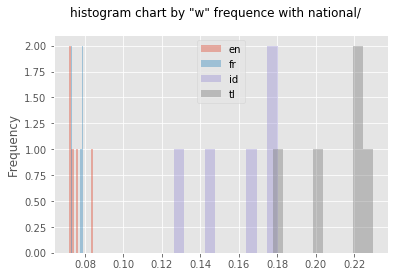

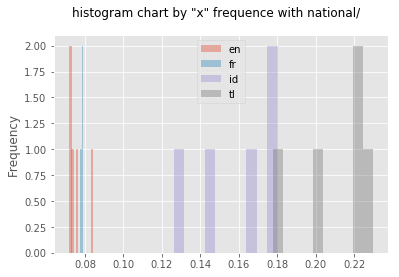

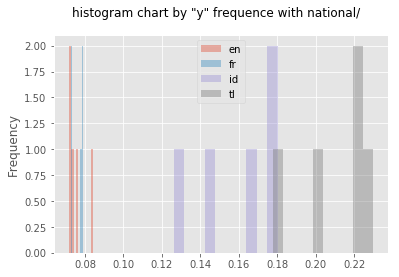

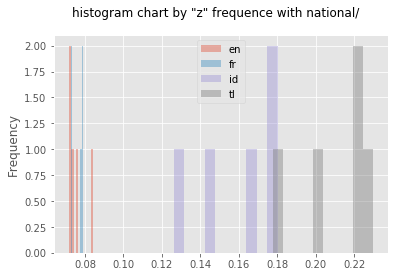

In [340]:
# 히스토 그램을 이용하여 알파벳 하나에 대한 국가별 비교
# a 문자가 국가별 단어에 사용되는 빈도수를 히스토그램으로 표현
# df_tmp 데이터를 이용하여 a의 빈도를 히스토그램으로 표현하시오. 
# 데이터를 돌면서 ( 답안 체크 )
#   df_tmp['label'].unique()    # unique를 이용해서 중복을 제거, 단일로 생성됨
for word in ascii_lowercase:    # 소문자로 for문 돌림
    for na in df_tmp['label'].unique():
        # 국가별로 돌면서
        # 1. 해당 국가의 데이터만 획득 => 
        df_tmp_na = df_tmp[ df_tmp['label']== na]
        #print(df_tmp_na.shape)
        # 한 번에 그려지는 데이터는 동일색상으로 처리
        df_tmp_na['a'].plot(kind='hist',alpha=0.4, label =na )   #alpha: 투명도 , na : 국가값
    plt.legend() # legend 최적의 장소에 그려준다   
    plt.suptitle('histogram chart by "%s" frequence with national/' %word)
    plt.savefig('../data/%s_freq.png' %(word))
    plt.show()

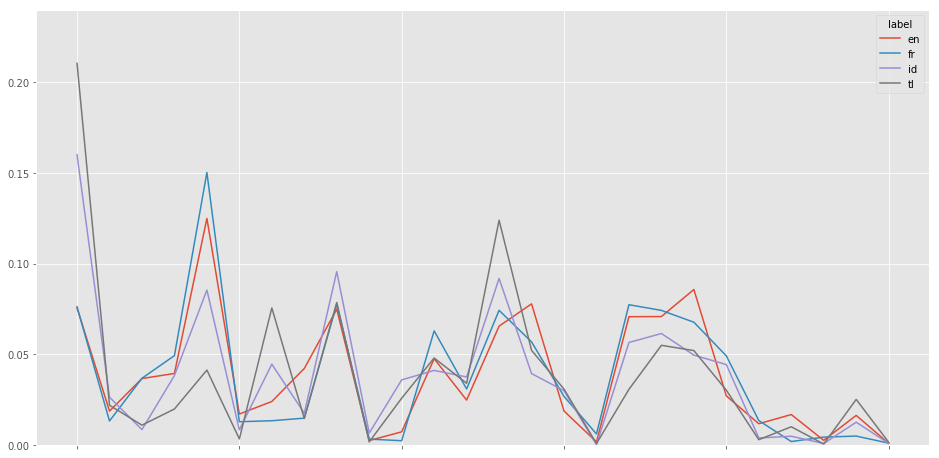

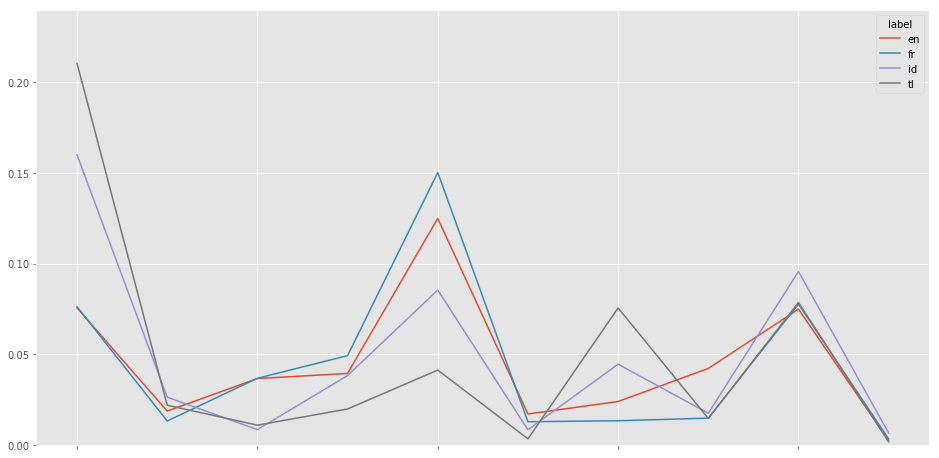

In [345]:
# 한 개의 차트에 국가 별로 언어 빈도를 연결한다. (선형, line 차트)
plt.style.use('ggplot')
df_tmp_pv.plot( kind = 'line', figsize=(16,8), ylim=(0, 0.24))
plt.show()
# 대부분 쓰이는 추세는 비슷하지만 사용량(증폭정도)가 다르다.


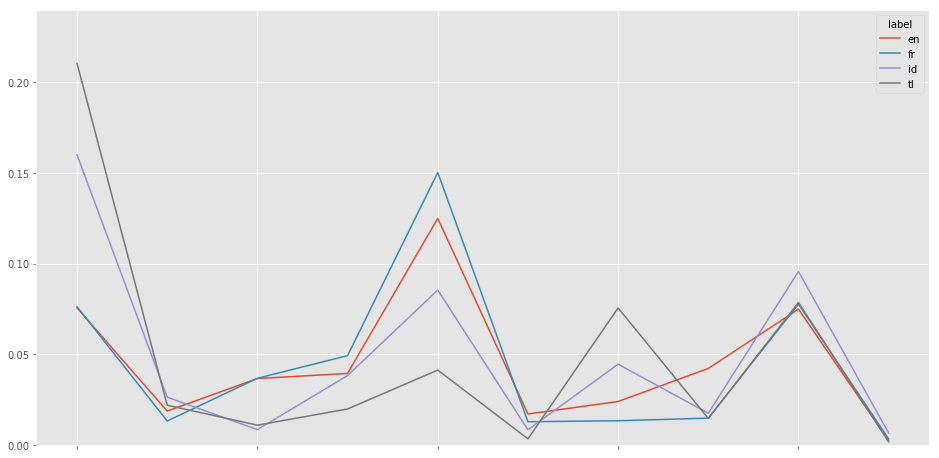

In [346]:
plt.style.use('ggplot')
df_tmp_pv.iloc[:10,:].plot( kind = 'line', figsize=(16,8), ylim=(0, 0.24))
plt.show()
# 일부 구간 : e~g 구간의 추이는 인디아/타갈리아어 vs 영어/프랑스계열이 추이가 확실히 다르다

### 5. 데이터모델링 or 모델구축

- 알고리즘 선택
- 훈련용 데이터, 테스트용 데이터 구성
- 훈련
- 예측모델 생성
- 새로운 데이터를 적용해서 예측
- 정확도 판단, 검증
- ------------------------------------------------(위 1부, 밑 2부 느낌)
- 파이프라인구축
- 하이퍼 타라미터 튜닝
- 성능평가

In [ ]:
 # 틀
    # 1. 알고리즘 선택
    # 2. 훈련데이터, 테스트데이터 구성
    # 3. 훈련
    # 4. 예측 모델, 예측 생성
    # 5. 예측
    # 6. 결과 확인

In [349]:
# 1. 알고리즘 선택
from sklearn import svm, metrics

In [350]:
#    1-1. 해당 알고리즘 객체 생성
#    생성할 때 파라미터를 대입 => 하이퍼파라미터 => 튜닝, 그 값의 여파로 성능/결과치가 변경
clf = svm.SVC(gamma = 'auto') # 알고리즘을 만들었다.

In [351]:
# 2. 훈련데이터, 테스트데이터 구성
# 이미 구성은 되어 있고, 훈련
# 훈련 함수명이나, 기타 단위 모듈들은 공통적으로 사용할 수 있게 인터페이스화되어 있다.
# 75%,25% 분류

In [352]:
len(train_data['freqs']), len(train_data['labels'])

(20, 20)

In [354]:
# 3. 훈련
# train_data
# test_data
clf.fit( train_data['freqs'],train_data['labels']  )

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [358]:
# 4. 예측 모델, 예측 생성  # 5. 예측
# 데스트 데이터의 답을 제외한 값들을 넣어서 예측 => 판정
predict = clf.predict(  test_data['freqs'] )


In [359]:
# 예측값 확인
predict

array(['en', 'en', 'fr', 'fr', 'en', 'id', 'tl', 'tl'], dtype='<U2')

In [360]:
# 6. 결과 확인
ac_score = metrics.accuracy_score(test_data['labels'],predict)

In [361]:
# 훈련량에 비해 잘 나왔다. 지향점은 95~97/8%까지 목표로 잡고, 그 이상은 과적합 문제에 봉착할 수 있어서 따로 검토
ac_score

0.875

In [372]:
cl_report = metrics.classification_report( test_data['labels'], predict  )
cl_report 
# precision : 정밀도    
# recall    : 재현율
# f1-score  : 점수, 정확도 
# support   : 데이터에 응답한 샘플 수 

'             precision    recall  f1-score   support\n\n         en       0.67      1.00      0.80         2\n         fr       1.00      1.00      1.00         2\n         id       1.00      0.50      0.67         2\n         tl       1.00      1.00      1.00         2\n\navg / total       0.92      0.88      0.87         8\n'

In [377]:
# 예측 모델을 전달 -> 덤프 (자료구조를 유지하면서 파일로 저장)
from sklearn.externals import joblib
joblib.dump( clf, '../data/clf_lang_20190830.model')
# 레이블 (정답의 후보들)
# with open('../data/clf_lang_labels.txt','w') as f:
#     for label in list(set(train_data['labels'])):
#         f.writelines( label+'\n')


In [381]:
label_dic = {
    'en': '영어',
    'id': '인도네시아어',
    'tl': '타갈리아어',
    'fr': '프랑스어'
}

In [382]:
with open('../data/clf_lang_labels.label', 'w', encoding='utf-8') as f: # w :쓰기모드
    json.dump( label_dic, f )

### 6. 시스템 통합 or (솔루션, 서비스 레포트)

- flask
- maridb : 데이터 축적, 예측 모델 데이터 업그레이드/다운그레이드 정보

- 남은 작업
- DB를 연동하여 언어 감지 및 번역 로그 남김
- 파파고 번역과 연동하여 실제 번역 진행
- 선순환 구조에 대한 고민(모델의 업그레이드, 다운그레이드 전략)